## Observations and Insights

## Dependencies and starter code

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
#print(mouse_metadata.head())
#print(study_results.head())

combine_data = pd.merge(mouse_metadata,study_results,how='inner',on='Mouse ID')

combine_data.loc[combine_data['Sex']=='Male',:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_regimen = combine_data.groupby(by='Drug Regimen')
summary_df = group_regimen['Tumor Volume (mm3)'].describe()
summary_df

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar plots

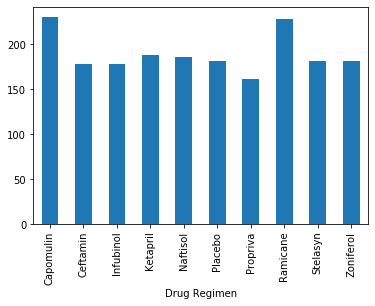

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary_df['count'].plot(kind='bar')
plt.show()

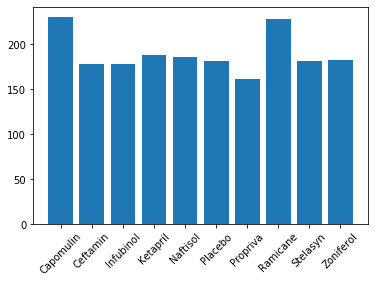

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
summary_df = summary_df.reset_index()
x_axis = np.array(summary_df['Drug Regimen'])
regimen_count = np.array(summary_df['count'])

fig,ax = plt.subplots()
ax.bar(x_axis,regimen_count)
plt.xticks(rotation=45)
plt.show()

## Pie plots

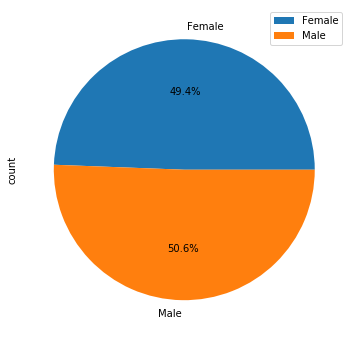

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combine_data.head()
sex_grouping = combine_data.groupby(by=['Sex'])
sex_describe = sex_grouping['Age_months'].describe()
#sex_describe = sex_describe.reset_index()
#sex_describe
sex_describe.plot(kind='pie',y='count',figsize=(6,6),autopct='%1.1f%%')
plt.show()

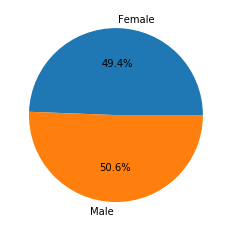

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#sex_describe = sex_describe.reset_index()
#sex_describe

labels = sex_describe['Sex']
sizes = sex_describe['count']

plt.pie(sizes,labels = labels, autopct='%1.1f%%')
plt.show()

## Quartiles, outliers and boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
tumor_volume = pd.DataFrame(group_regimen['Tumor Volume (mm3)'].sum())
tumor_volume = tumor_volume.reset_index()
quartile_values = tumor_volume.quantile([0.25,0.5,0.75])
lowerq = tumor_volume.quantile([0.25])
upperq = tumor_volume.quantile([0.75])
iqr = tumor_volume['Tumor Volume (mm3)'].quantile(0.75)-tumor_volume['Tumor Volume (mm3)'].quantile(0.25)
iqr

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'The lower bound is: {lower_bound}')
print(f'The upper bound is: {upper_bound}')

The lower bound is:       Tumor Volume (mm3)
0.25         8681.426945
The upper bound is:       Tumor Volume (mm3)
0.75         10482.61507


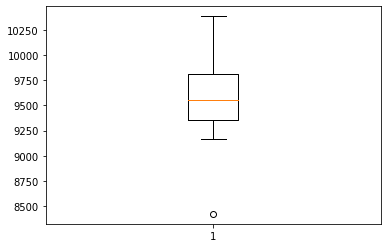

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax = plt.subplots()
#ax1.boxplots(tumor)
data = tumor_volume['Tumor Volume (mm3)']
ax.boxplot(data)
plt.show()

## Line and scatter plots

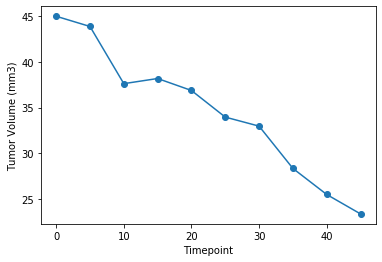

In [96]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data = combine_data.loc[combine_data['Drug Regimen']=='Capomulin',['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
data = data.loc[data['Mouse ID']== 's185']
data.head(50)

plt.plot(data['Timepoint'],data['Tumor Volume (mm3)'],marker='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

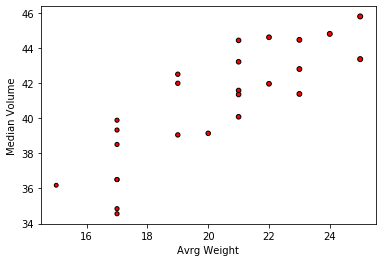

In [95]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#combine_data.head()
mouse_weight_data = combine_data.loc[combine_data['Drug Regimen']=='Capomulin',['Mouse ID','Weight (g)','Tumor Volume (mm3)']]
mouse_id_group = mouse_weight_data.groupby(by="Mouse ID")
avrg_mouse_volume = mouse_id_group['Tumor Volume (mm3)'].mean()
avrg_mouse_weight = mouse_id_group['Weight (g)'].mean()
#print(avrg_mouse_volume)
#print(avrg_mouse_weight)

plt.scatter(avrg_mouse_weight,avrg_mouse_volume,marker='o',facecolors='red',edgecolors='black',s=avrg_mouse_weight)
plt.xlabel('Avrg Weight')
plt.ylabel('Median Volume')
plt.show()

In [87]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avrg_mouse_volume,avrg_mouse_weight)
print(f'The correlation between mouse weight and average tumor is: {correlation[0]}')

The correlation between mouse weight and average tumor is: 0.8419363424694716


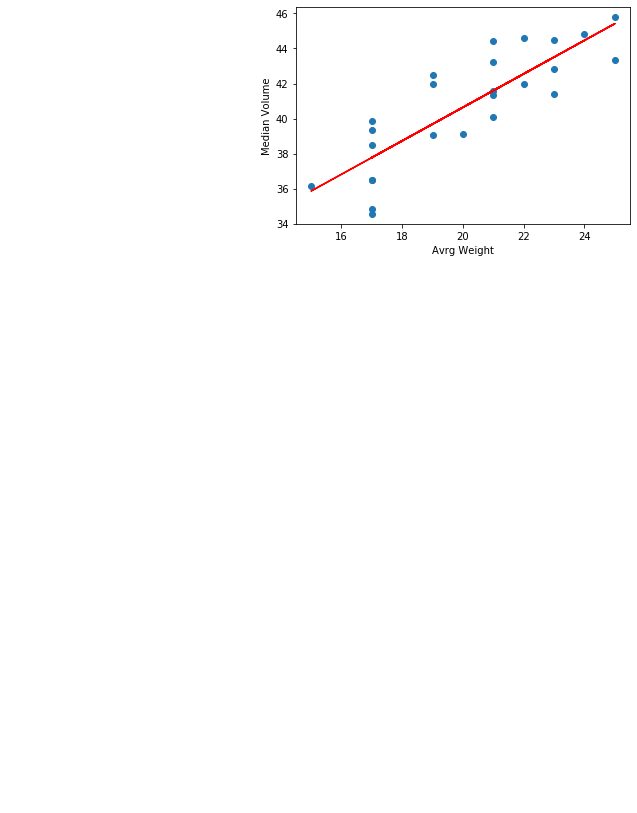

In [94]:
x_values = avrg_mouse_weight
y_values = avrg_mouse_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,1),fontsize=15,color="red")
plt.xlabel('Avrg Weight')
plt.ylabel('Median Volume')
plt.show()